### 1.계층적 군집분석(병합군집 알고리즘 : agglomerative clustering)

- 시작할 때 각 포인트를 하나의 클러스터로 지정하고, 
- 그 다음 종료조건을 만족할 때까지 가장 비슷한 두 클러스터를 합친다.
- 클러스터 갯수, 지정된 갯구의 클러스터가 남을 때까지 비슷한 클러스를 합친 후 종료한다.

- linkage: 옵션에서 가장 비슷한 클러스터를 측정하는 방법 지정, 이 측정은 항상 두 클러스터 사이에서 이뤄짐
- ward : 기본값, 모든 클러스터 내의 분산을 가장 작게 증가시키는 두 클러스터를 합침, 크기가 비교적 비슷한 클러스터가 만들어짐
- average : 클러스터 포인트 사이의 평균 거리가 가장 짤븐 두 클러스터를 합침
- complete : complete연결(최대 연결)은 클러스터 포인트 사이의 최대 거리가 가장 짧은 두 클러스터를 합침

- 클러스터에 속한 포인트 수가 많이 다를 때는 average나 complete가 더 좋은 방법이다.

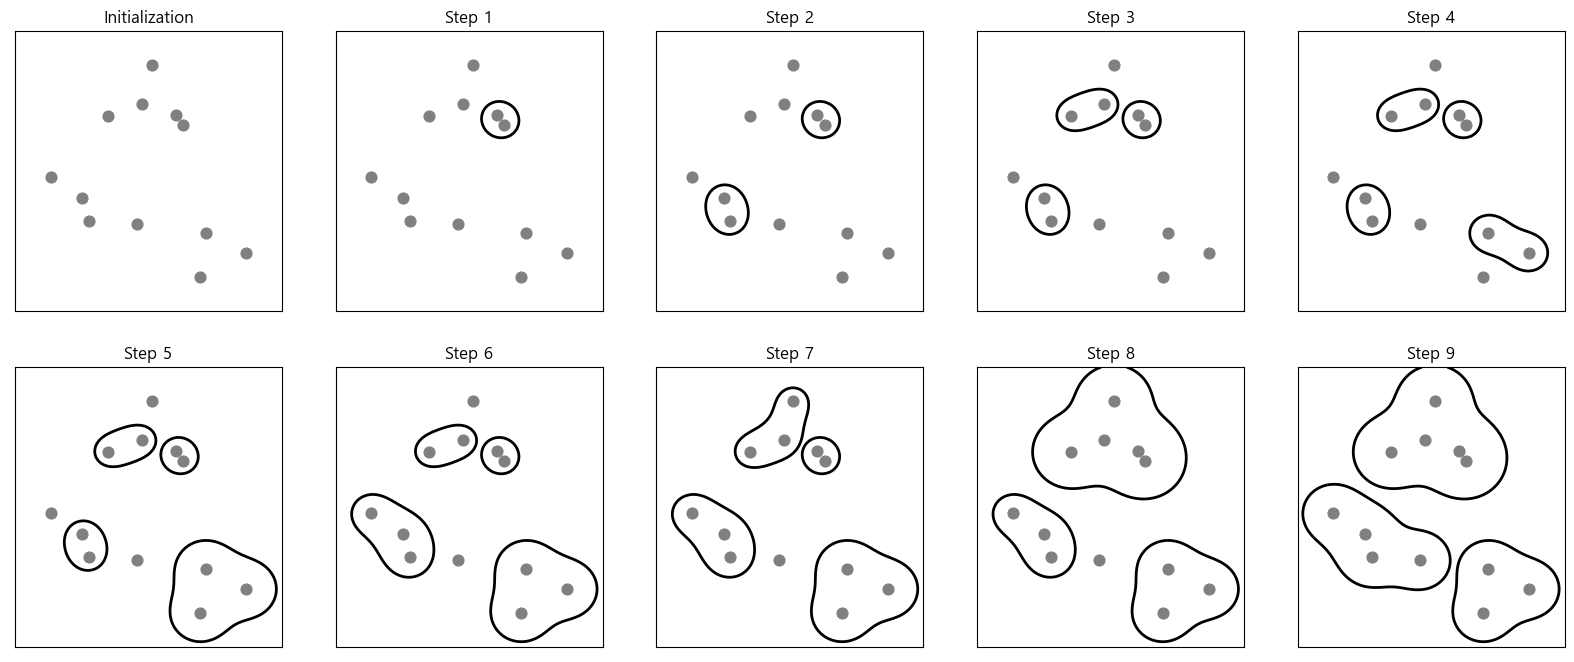

In [1]:
# library import
import mglearn
import matplotlib
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_moons
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, ward, linkage


# matplotlib 설정
matplotlib.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

# 알고리즘 설명 시각화
mglearn.plots.plot_agglomerative_algorithm()
plt.show()

- 위 그림은 클러스터를 반복적으로 합쳐나가는 병합 군집이다. 
- 진행하는 방식은 아래와 같다.

1. 초기에 각 포인트가 하나의 클러스터
2. 가장 가까운 두 클러스터가 합쳐짐
3. step4까지 이 방식으로 진행
4. step5에서 두 개의 포인트를 가진 클러스중 하나가 3개로 확장
5. step9까지 이 방식으로 진행
6. 3개의 클러스터를 찾는다고 지정하면 알고리즘은 종료

Text(0, 0.5, '특성 1')

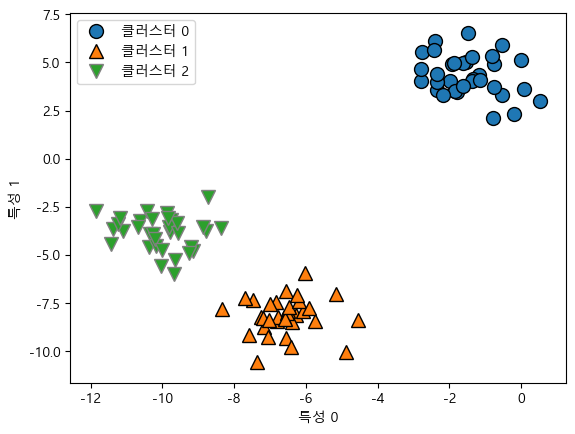

In [2]:
from sklearn.cluster import AgglomerativeClustering
X, y = make_blobs(random_state=1) #인위적인 데이터 만들기

# agg모델을 생성하여 학습 후 예측까지
agg = AgglomerativeClustering(n_clusters=3)
assignment = agg.fit_predict(X)

# 시각화 하기
# ???
mglearn.discrete_scatter(X[:, 0], X[:, 1], assignment)
plt.legend(["클러스터 0", "클러스터 1", "클러스터 2"], loc="best")
plt.xlabel("특성 0")
plt.ylabel("특성 1")

### 3. dendrogram으로 3차원 이상의 데이터 시각화
- Dendrogram은 어떤 feature가 있는지, 군집화가 어떻게 되었는지 명확하게 볼 수 있다.

Text(0, 0.5, '클러스터 거리')

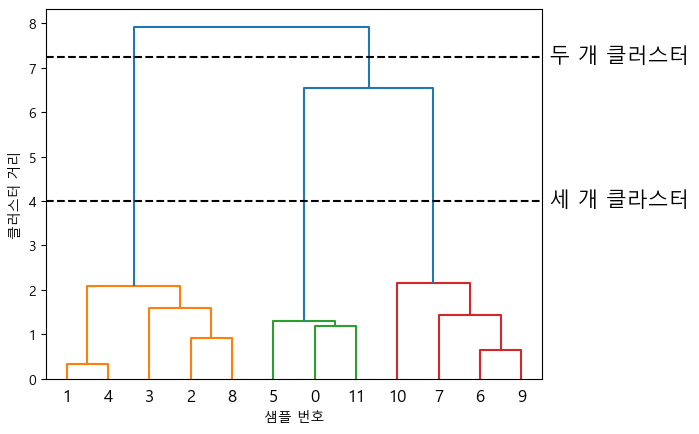

In [3]:
# 데이터셋 만들기
X, y = make_blobs(random_state=0, n_samples=12)

# 데이터 배열 x에 ward 함수를 적용
# scipy의 ward 함수는 병합 군집을 수행할 때 생성된 거리 정보가 담긴 배열을 반환
linkage_array = ward(X)

# 클러스터 간 거리 정보가 담긴 linkage_array를 사용해서 덴드로그램을 그림
dendrogram(linkage_array)

# 클러스터 갯수를 구분하는 라인을 그어서 그림
ax = plt.gca() # get current axes
bounds = ax.get_xbound() # x축 데이터(처음과 끝), 즉 최소/최대값을 가진 (1,2)리스트
ax.plot(bounds, [7.25, 7.25], '--', c='k') # 임의로 라인 생성
ax.plot(bounds, [4, 4], '--', c='k')

 # bounds: x축 끝
ax.text(bounds[1], 7.25, ' 두 개 클러스터', va='center', fontdict={'size': 15})
ax.text(bounds[1], 4, ' 세 개 클라스터', va='center', fontdict={'size': 15})
plt.xlabel("샘플 번호")
plt.ylabel("클러스터 거리")

- 가지의 길이는 합쳐진 클러스터가 얼마나 멀리 떨어져 있는지를 보여줌
- 빨강 그룹과 바다색 그룹이 합쳐질때 가지의 길이는 짧아짐 ==> 비교적 짧은 거리의 데이터를 병합

방향 변경 방법

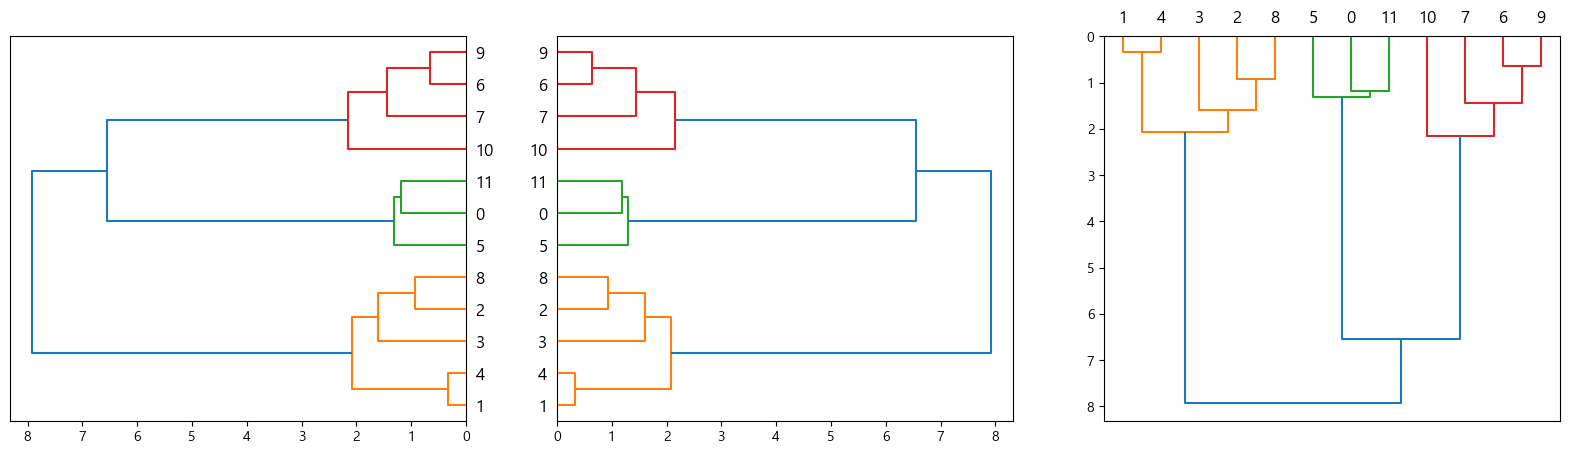

In [4]:
fig = plt.figure(figsize=(20,5))

ax1 = fig.add_subplot(1, 3, 1)
d1 = linkage(X, method='ward')
dr1 = dendrogram(d1, orientation='left')

ax2 = fig.add_subplot(1, 3, 2)
d2 = linkage(X, method='ward')
dr2 = dendrogram(d1, orientation='right')

ax3 = fig.add_subplot(1, 3, 3)
d3 = linkage(X, method='ward')
dr3 = dendrogram(d1, orientation='bottom')

plt.show()

### Descan

#### DBSCAN은 클러스터릐 갯수를 미리 지정하지 않는 군집알고리즘이다.
- 병합군집이나 K-mean보다는 다소 느리지만 비교적 큰 데이터셋에도 적용이 가능하다.

- 데이터의 dense region을 클러스트를 구성하며 비교적 비어있는 지역을 경계로 다른 클러스터로 구분한다.
- dense region에 있는 포인트를 core point라고도 한다. 

    - core point : min_samples, eps(epsilon) 
        : 한 데이터 포인트에서 eps 거리 안에 데이터가 min_samples 갯수만큼 들어 있으면   
          이 데이터 포인트를 핵심 포인트로 분류 eps(거리)보다 가까운 핵심 샘플은 동일한 클러스터로 분류  
          

핵심포인트, 경계포인트(핵심 포인트에서 eps거리 안에 있는 포인트), 잡음 포인트가 핵심

DBSCAN을 한 데이터셋에 여러 번 실행하면 핵심 포인트의 군집은 항상 같고,   
매번 같은 포인트를 잡음으로 레이블함  
그러나 경계포인트는 한 개 이상의 핵심 포인트 샘플의 이웃일 수 있음

알고리즘

1. 무작위로 데이터 포인트를 선택  
2. 그 포인트에서 eps 거리안의 모든 포인트를 찾음    
2-1. eps 거리 안에 있는 데이터 포인트 수가 min_samples보다 적다면 어떤 클래스에도 속하지 않는 잡음noise로 레이블  
2-2. eps 거리 안에 있는 데이터 포인트 수가 min_samples보다 많으면 핵심 포인트로 레이블하고 새로운 클러스터 레이블할당  
3. 2-2의 핵심 포인트의 eps거리안의 모든 이웃을 살핌  
3-1. 만약 어떤 클러스터에도 아직 할당되지 않았다면 바로 전에 만든 클러스터 레이블을 할당  
3-2. 만약 핵심 포인트면 그 포인트의 이웃을 차례로 확인  
4. eps 거리안에 더이상 핵심 포인트가 없을 때까지 진행  

In [5]:
from sklearn.cluster import DBSCAN
X, y = make_blobs(random_state=0, n_samples=12)

dbscan = DBSCAN()
clusters = dbscan.fit_predict(X)
print("클러스터 레이블:\n{}".format(clusters))

# 결과값을 보면 모두 -1인데, 
# 군집을 나누지 않고 하나의 군집으로 봤다는 뜻이다.

클러스터 레이블:
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


min_samples: 2 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  cluster: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]


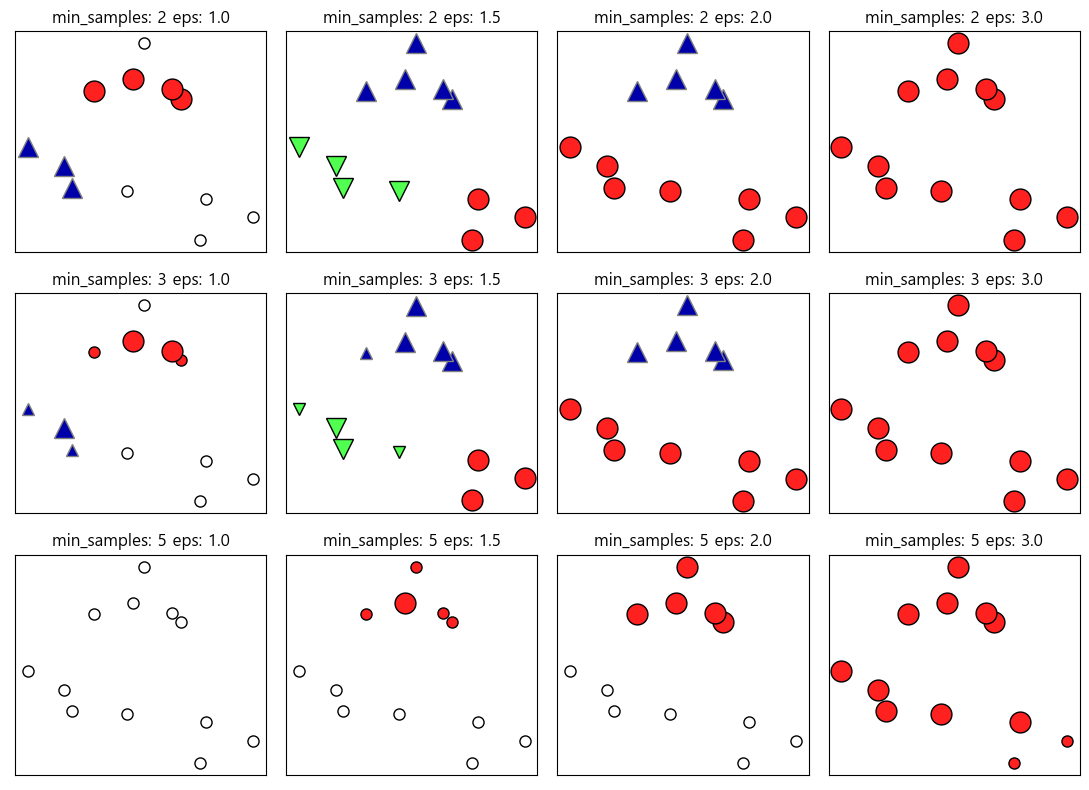

In [6]:
mglearn.plots.plot_dbscan()

Text(0, 0.5, '특성 1')

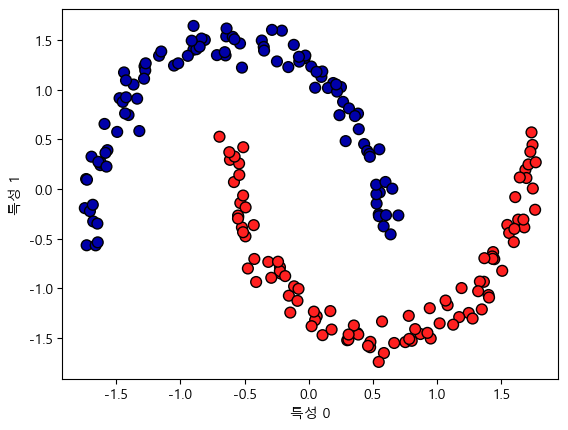

In [9]:
from sklearn.preprocessing import StandardScaler

X, y = make_moons(n_samples=200, noise=0.05, random_state=1)

# 스케일링 하기
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# dbscan 모델 생성, 학습, 예측
dbscan = DBSCAN()
clusters = dbscan.fit_predict(X_scaled)

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm2, s=60, edgecolors='black')
plt.xlabel("특성 0")
plt.ylabel("특성 1")